<h1>Criminal dataset</h1>

<p>Police violence has become a high-profile topic in recent months due to the death of George Flyod. A wave of anti-racism protests swept across the United States, but just ... why exactly after this incident? Undoubtedly, a very important role was played by the fact that the whole dramatic situation of George Floyd's murder was recorded, and the video of this incident quickly circulated the internet. So we will look at what the shots fired by the police looked like depending on whether the policeman was wearing a camera? Did having a camera affect what the attack looked like? Were young or old people, women or men relatively more often attacked with the camera on? If the policeman has a camera, is the attacked person more likely to survive? Let's find out! </p>

<h2>Let's start exploring and preparing the data</h2>

<b>We can first identify our variables</b> 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from utils import state_code
# Graphics in retina format are more sharp and legible
%config InlineBackend.figure_format = 'retina'

<b>Read criminal dataset</b>

In [3]:
cols_name = ["id","name","date","manner_of_death","armed","age","gender","race","city","state","signs_of_mental_illness","threat_level","flee","body_camera","arms_category"]
df = pd.read_csv("shootings.csv", usecols=cols_name, parse_dates=['date'])
df = df.drop(["id"], axis=1)

<b>Input variables:</b>
<ul>
    <li>Date - Character, Continious</li>
    <li>Manner of death - Character, Categorical</li>
    <li>Armed - Character, Categorical</li>
    <li>Age - Numerical, Continious</li>
    <li>Gender - Character, Categorical</li>
    <li>City - Character, Categorical</li>
    <li>State - Character, Categorical</li>
    <li>Signal of mentall illness - Boolean, Categorical</li>
    <li>Threat level - Character, Categorical</li>
    <li>Flee - Character, Categorical</li>
    <li>Body camera - Boolean, Categorical</li>
    <li>Arms category - Character, Categorical</li>
</ul>
<b>Derived variables</b>
<ul>
    <li>Year - Numerical, Continious</li>
    <li>Month - Numerical, Continious</li>
    <li>Day - Numerical, Continious</li>
    <li>Age_range - Character, Categorical</li>
</ul>
<b>Target variables</b>
<ul>
    <li>Race - Character, Categorical</li>
    <li>Manner of death</li>
</ul>

<p>We are going to start exploring the data but before that, we can do a list of useful <b>predictions</b> that could be interesting to know</p>
<ul>
    <li>Prediction of the criminality of the following year</li>
    <li>Predict manner of death of a person depending on factors like: race, gender...</li>
    <li>Predict the age of a person depending certain factors</li>
    
</ul>

<h2>Add derived columns</h2>


In [4]:
df["count"] = 1
df["year"] = df["date"].dt.year
df["month"] = df["date"].dt.month
df["day"] = df["date"].dt.day

bins= [-1,18,30,40,55,65,110]
labels = ['Under 18','18-30','31-40','41-55','56-65', 'Above 65']
df['age_range'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)
df.head()

,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category,count,year,month,day,age_range
0,Tim Elliot,2015-01-02,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,Guns,1,2015,1,2,41-55
1,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,Guns,1,2015,1,2,41-55
2,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,Unarmed,1,2015,1,3,18-30
3,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False,Other unusual objects,1,2015,1,4,31-40
4,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,Piercing objects,1,2015,1,4,31-40


<b>Read population dataset</b>

In [5]:
# Deal with population data
pop_cols = ["State", "TotalPop", "Men", "Women", "Hispanic", "White", "Black", "Native", "Asian", "Poverty", "Unemployment"]
df_pop = pd.read_csv("./census_data.csv")
# Take only necessary columns
df_pop = df_pop[pop_cols]
# Group by state and normalize data
df_pop.loc[:, 'Hispanic':'Asian'] = df_pop.loc[:, 'Hispanic':'Asian'].div(100).round(2)
df_pop.loc[:, 'Hispanic':'Unemployment'] = df_pop.loc[:, 'Hispanic':'Unemployment'].multiply(df_pop["TotalPop"], axis="index").round()
df_pop = df_pop.groupby("State", as_index=False).sum()
df_pop['State'] = df_pop['State'].map(state_code)
df_pop.head()

,State,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Poverty,Unemployment
0,AL,4850771,2350806,2499965,197476.0,3197968.0,1280794.0,20063.0,60619.0,88123690.0,37597442.0
1,AK,738565,386319,352246,50039.0,454361.0,22321.0,101705.0,44489.0,7525254.0,6024500.0
2,AZ,6809946,3385055,3424891,2104603.0,3785722.0,275947.0,264004.0,206584.0,116929300.0,50368390.0
3,AR,2977944,1461651,1516293,213044.0,2174175.0,456313.0,14767.0,41044.0,54653478.0,19190430.0
4,CA,38982847,19366579,19616268,15104590.0,14775788.0,2155028.0,119422.0,5427452.0,591001027.0,307015628.0


<p>Sum of the population in USA</p>

In [6]:
total_pop = df_pop.sum(axis=0).rename('Total')
total_pop

TotalPop        3.244734e+08
Men             1.596728e+08
Women           1.648006e+08
Hispanic        5.992667e+07
White           1.972953e+08
Black           3.939618e+07
Native          1.951719e+06
Asian           1.692493e+07
Poverty         4.892458e+09
Unemployment    2.237827e+09
Name: Total, dtype: float64

<h2>Univariate analysis</h2>
<p>We can see in our data we have a majority of categorical and character data, now we can explore variables one by one</p>
<h3>Total shootings & Number of people in USA</h3>

In [7]:
total_shootings = df.count()[0]
print('Total shootings by police: ' + str(total_shootings))
print('Total population in USA: ' + f"{int(total_pop['TotalPop']):,}")

Total shootings by police: 4895
Total population in USA: 324,473,370


<h3>People dead because of shots fired by police</h3>

In [8]:
people_died_by_shots = (total_shootings / total_pop["TotalPop"]) * 100
print(str(round(people_died_by_shots, 4)) + '%')

0.0015%


<h3>Criminal activity by year</h3>

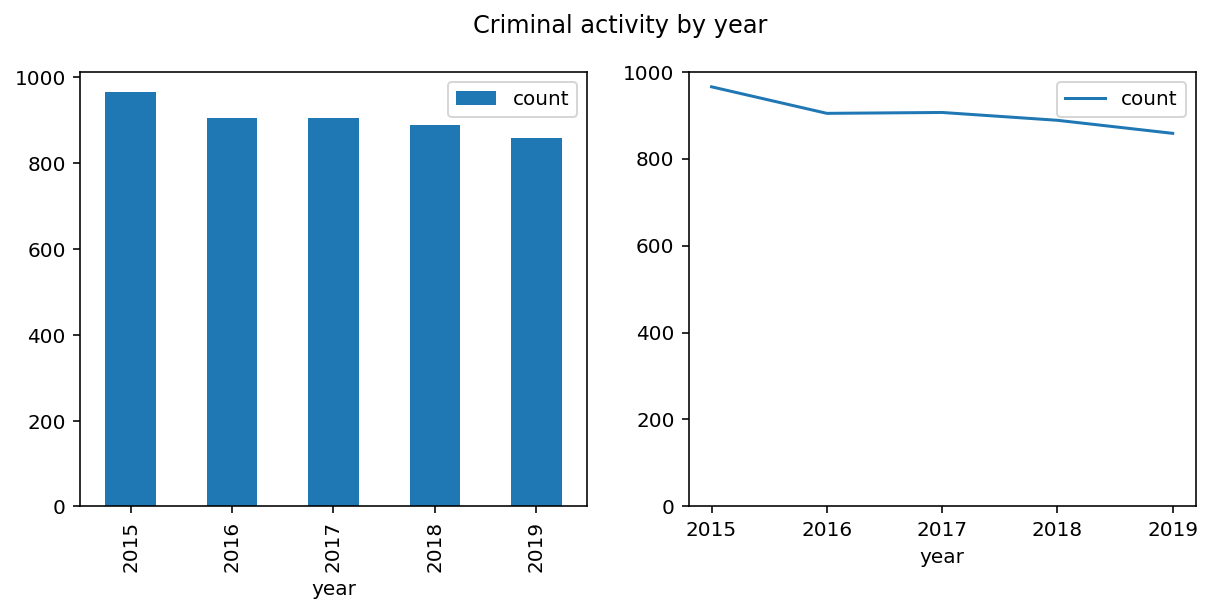

In [9]:
# Plot
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Criminal activity by year')

# Is there a year with more criminal activity since 5 years ago?
ca_bytime = df[['year', 'count']].copy()
ca_bytime_without_2020 = ca_bytime.loc[ca_bytime["year"] < 2020]
ca_bytime_count = ca_bytime_without_2020.groupby(['year']).count()

ca_bytime_count.plot(kind='bar', ax=ax1, figsize=(10, 4))
ca_bytime_count.plot(kind='line', ax=ax2, ylim=(0,1000))

plt.show()

<h3>Criminal activity by month</h3>

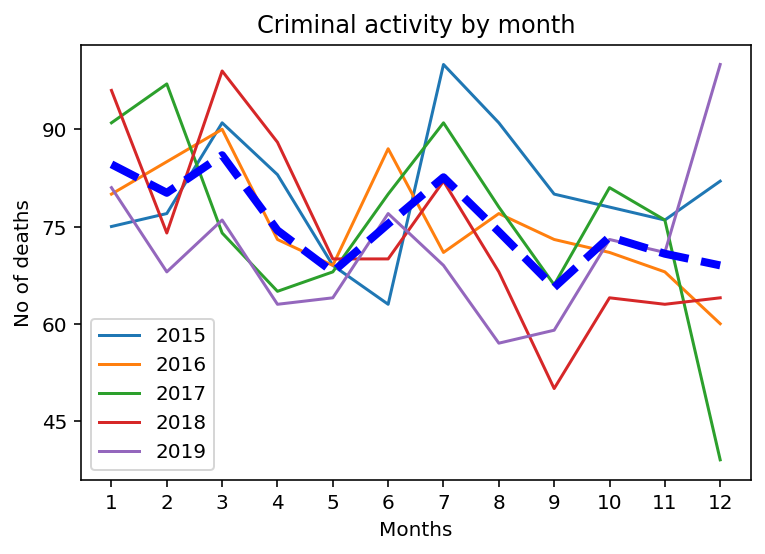

In [10]:
# Create a copy and get only months from 2015 (maybe better if we add every year)
ca_byyear = df[['month', 'year', 'count']].copy()

# Process data
ca_byyear = ca_byyear.loc[ca_byyear["year"] < 2020] # Pull 2020 out
ca_byyear_plot = ca_byyear.groupby(["month", "year"]).count().unstack(level = 1)

# Plot
plt.plot(ca_byyear_plot)
plt.title("Criminal activity by month")
plt.xlabel("Months")
plt.ylabel("No of deaths") 
plt.xticks(np.arange(1, 13, 1))
plt.yticks(np.arange(0, 150, 15))
plt.legend(["2015","2016","2017","2018","2019"])

ca_byyear_plot["avg"] = ca_byyear_plot.loc[:, :].mean(axis=1)
plt.plot(ca_byyear_plot["avg"], 'b--', linewidth=4)
plt.show()

<h3>Percentage of people dead wearing a camera</h3>

Percentage of people dead wearing a camera in total: 11%


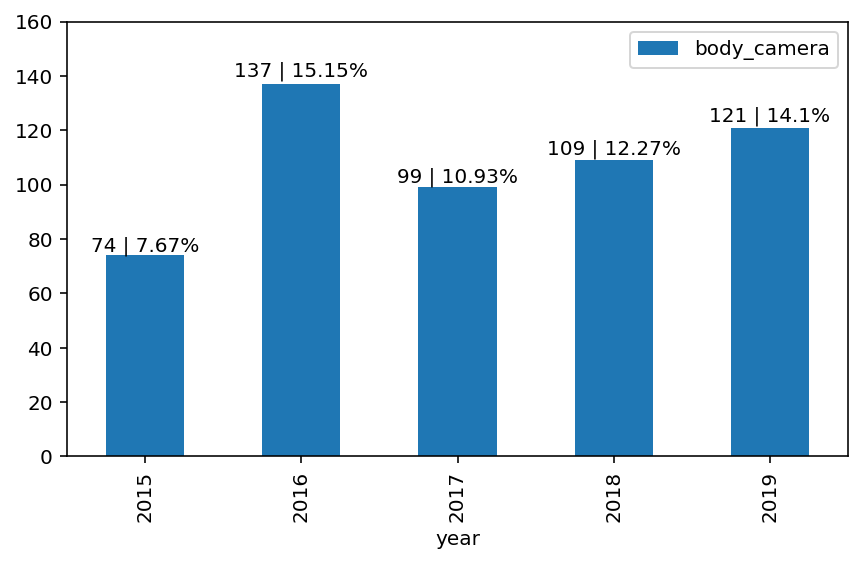

In [14]:
fig, ax = plt.subplots()

percent_incidents_filmed = df["body_camera"].sum() * 100 // total_shootings
print('Percentage of people dead wearing a camera in total: ' + str(percent_incidents_filmed) + '%')

df_camera = df[["year", "body_camera"]].copy()
df_camera = df_camera.loc[df_camera["year"] < 2020] # Pull 2020 out
df_camera["body_camera"] = df_camera["body_camera"].astype(int)

df_camera_plot = df_camera.groupby('year').sum()
df_camera_plot["body_camera_count"] = df_camera.groupby('year')["body_camera"].count()
df_camera_plot["percentage"] = round((df_camera_plot["body_camera"] / df_camera_plot["body_camera_count"]) * 100, 2)

df_camera_plot.plot(kind='bar', y='body_camera', ax=ax, ylim=(0, 160), figsize=(7, 4))
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    value = str(df_camera_plot.loc[df_camera_plot["body_camera"] == height]["percentage"].item()) + '%'
    ax.annotate((f"{height} | " + value), (x + width/2, y + height*1.02), ha='center')
    
plt.show()

<h3>Criminal activity by GENDER</h3>

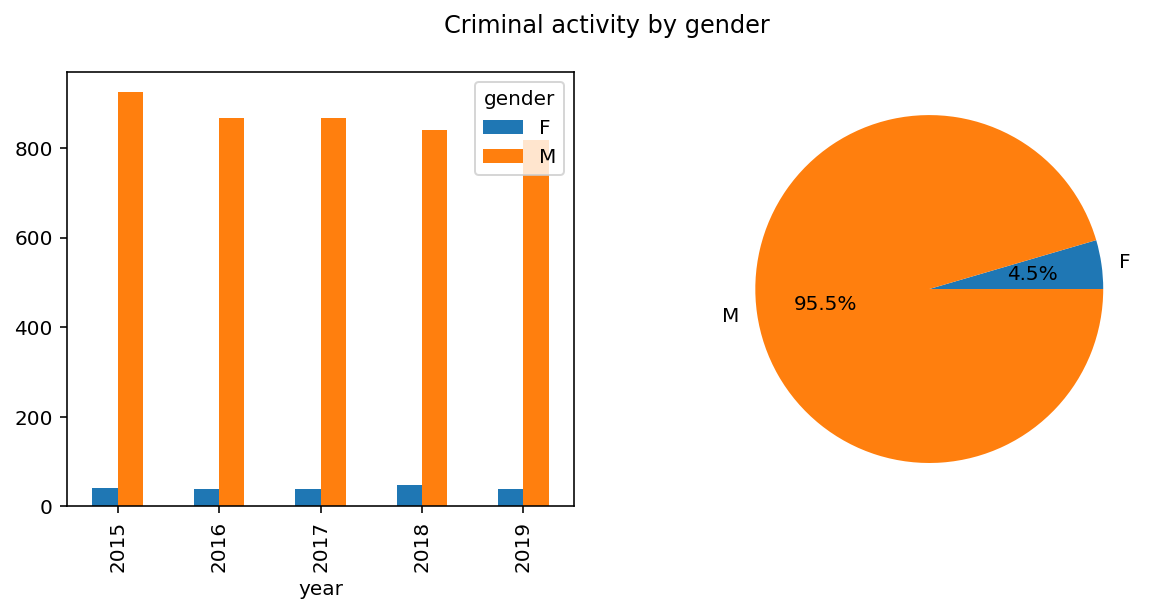

In [26]:
# Plot
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Criminal activity by gender')

# Create a copy and get only months from 2015 (maybe better if we add every year)
ca_gender = df[['year', 'gender']].copy()
ca_gender = ca_gender.loc[ca_gender["year"] < 2020] # Pull 2020 out

# Group by year & gender
ca_gender_plot = ca_gender.groupby(["year"])["gender"].value_counts().unstack(level = 1)

# Figure 1
ca_gender_plot.plot(kind="bar", ax=ax1, figsize=(10, 4))


# Figure 2
pie_m = df[df["gender"] == "M"].count()[0] 
pie_f = df[df["gender"] == "F"].count()[0]
total = pie_m + pie_f

ax2.pie([pie_f/total, pie_m/total], labels=('F','M'), autopct='%1.1f%%')
plt.show()

<h3>Criminal activity by races in criminal dataset</h3>

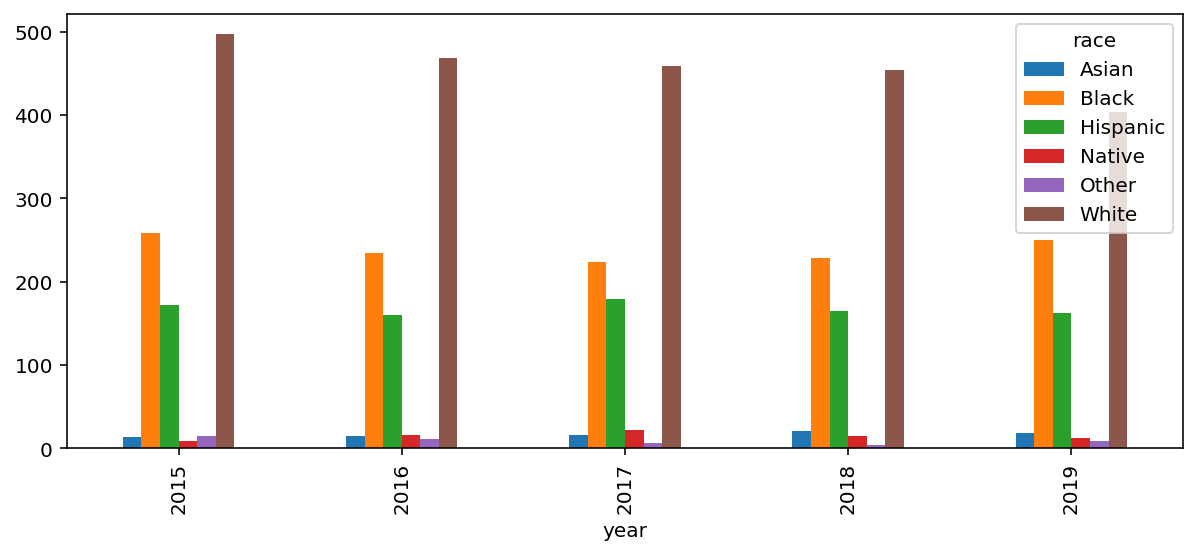

In [33]:
# Create copy
ca_race = df[['year', 'race']].copy()
ca_race = ca_race.loc[ca_race["year"] < 2020] # Pull 2020 out

# Figure 1
ca_race_plot = ca_race.groupby(["year"])["race"].value_counts().unstack(level = 1)
ca_race_plot.plot(kind="bar", figsize=(10, 4))

plt.show()

<h3>Criminal activity by races checking population</h3>

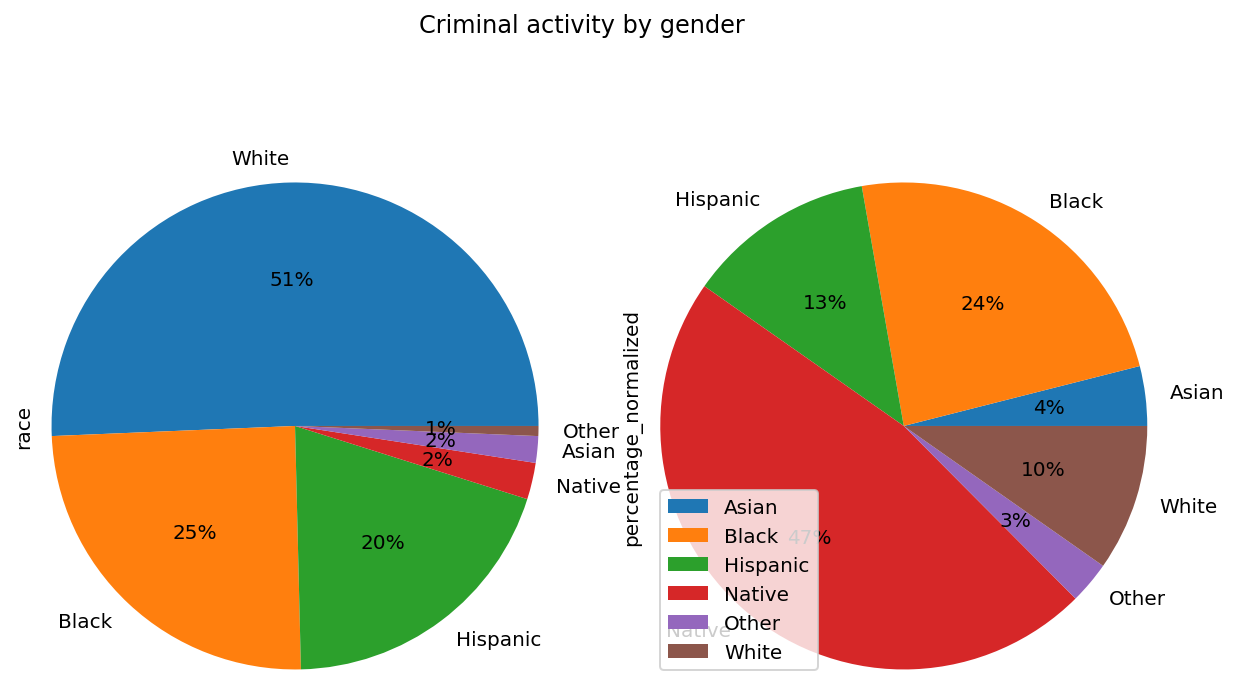

In [93]:
# Plot
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Criminal activity by gender')

# Figure 1
ca_gender_2017 = df[['year', 'race']].copy()

ca_gender_2017 = ca_gender_2017.loc[ca_gender_2017["year"] == 2017]
ca_gender_2017_plot = ca_gender_2017["race"].value_counts()

ca_gender_2017_plot.plot(kind="pie", ax=ax1, radius=1.2, figsize=(10, 6), autopct='%1.0f%%')

# ----------------------------
# Figure 2

ca_pop_race = df[["race", "year", "count"]].copy()

ca_pop_race = ca_pop_race[ca_pop_race["year"] == 2017] # Get only 2017
ca_pop_race = ca_pop_race.drop(columns='year') # Drop year column

ca_pop_race = ca_pop_race.groupby("race", as_index=False).sum() # Group by race

# Add population to table
pop_other = total_pop["TotalPop"] - (total_pop[3:8].sum()).item()
ca_pop_race["population"] = ca_pop_race["race"].apply(lambda row: pop_other if row == "Other" else total_pop[row].item())

# Add percentage
ca_pop_race["percentage"] = (ca_pop_race["count"] / ca_pop_race["population"]) * 100
total_percentage = ca_pop_race["percentage"].sum()

ca_pop_race["percentage_normalized"] = ca_pop_race["percentage"] / total_percentage


# Plot pie
ca_pop_race.plot(kind="pie", y='percentage_normalized', radius=1.2, autopct='%1.0f%%', ax=ax2, labels=["Asian", "Black", "Hispanic", "Native", "Other", "White"])

plt.show()

<b>Left people dead in total / Right people dead comparing population each race</b>

<h3>Criminal activity by LOCATION</h3>

In [101]:
# MERGE TOTAL POP BY LOCATION

# Create a copy and get only months from 2015 (maybe better if we add every year)
ca_location = df[['year', 'state', 'count']].copy()

# Process data
ca_location = ca_location.loc[ca_location["year"] == 2017]
ca_location = ca_location.drop(columns='year')
ca_location = ca_location.groupby('state', as_index=False).sum()

ca_location["population"] = ca_location["state"].apply(lambda st)

# ca_gender_plot
ca_location.head(6)

,state,count
0,AK,7
1,AL,21
2,AR,10
3,AZ,39
4,CA,143
5,CO,27


<b>Texas is the state with more criminal activity following, Florida</b>

<h3>Most of the suspects had</h3>

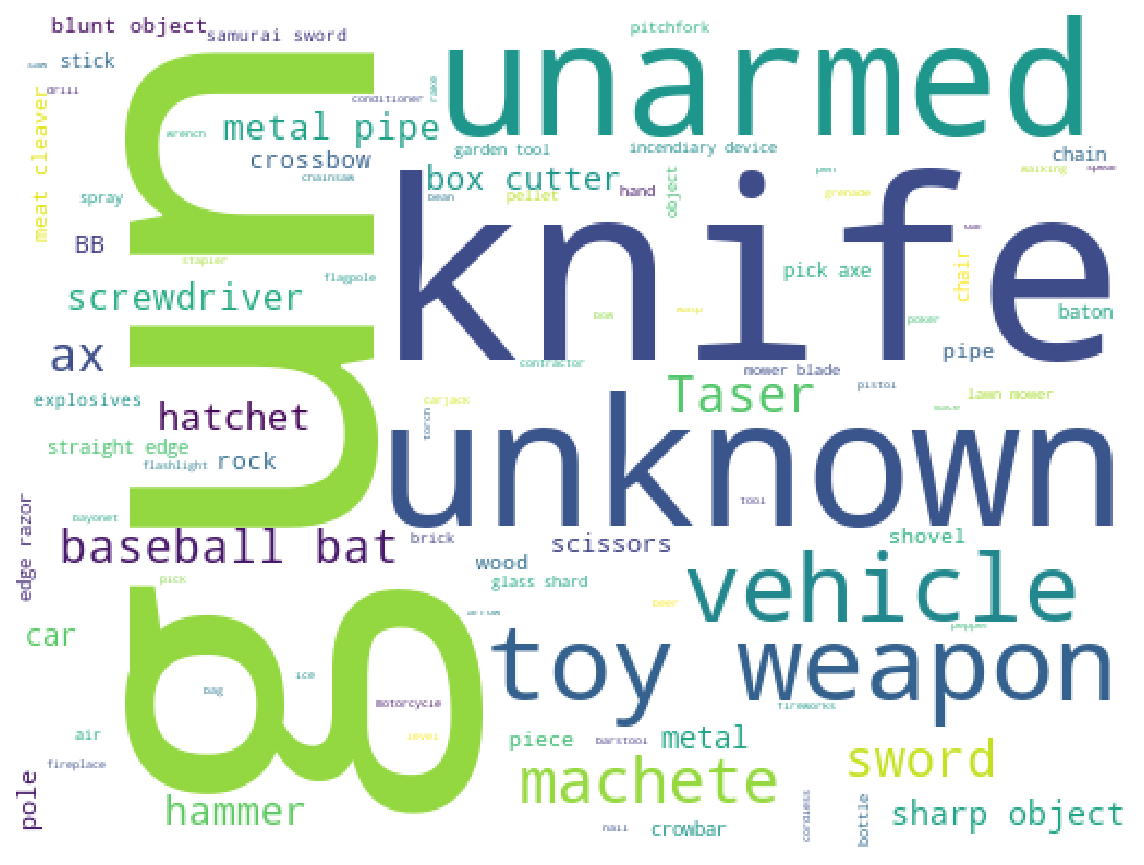

In [91]:
from wordcloud import WordCloud

ca_weapons = df['armed']

plt.subplots(figsize=(10,19))
wordcloud = WordCloud(background_color = 'white',
                     width=512,
                     height=384).generate(" ".join(list(ca_weapons))+" ")

plt.imshow(wordcloud)
plt.axis('off')
plt.show()

<h1>Bi-variate analysis</h1>

<p>Bi-variate Analysis finds out the relationship between two variables.</p>

<p>We can analyze Categorical vs Continious or Categorical vs Categorical. The continous correlation can be easily done with Pearson's method and Pandas, but for categorical data we need to find something else.</p>

In [ ]:
corr = df.corr()
print(corr)
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)


<p>We do not see much correlation between this continous variables, the most correlated columns are mental illness and age</p>

nvofdsnvdsfpv